# Laptop Price Prediction

### - Hypothesis Testing

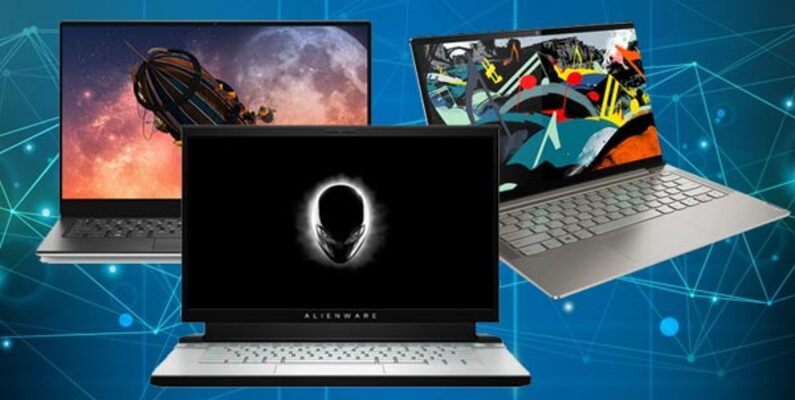

### Hypothesis Testing
- This is a statistical technique used to determine whether a claim about a population parameter is true or not based on a sample data. It involves testing a sample of data to make inferences about the larger population.

### Types

- Null hypothesis
- Alternative hypothesis

## Step 1: Loading the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Step 2: Data loading and understanding


In [3]:
laptop_data = pd.read_csv('laptop_data_cleaned.csv')

# Display first 5 rows of the data

laptop_data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
# Display the last 5 records of the data

laptop_data.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [7]:
# Display the shape of the data

laptop_data.shape

(1273, 13)

In [8]:
# Exploring the statistical summary of categorical data
laptop_data.describe(include='object')

,Company,TypeName,Cpu_brand,Gpu_brand,Os
count,1273,1273,1273,1273,1273
unique,19,6,5,3,3
top,Dell,Notebook,Intel Core i7,Intel,Windows
freq,291,706,515,703,1100


In [9]:
# Exploring the statistical summary of the numerical data
laptop_data.describe(exclude='object')

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [13]:
# Splitting into numerical and categorical data

numerical_data = laptop_data.select_dtypes(exclude='object')
categorical_data = laptop_data.select_dtypes(include='object')

display(numerical_data.head())
print('---' * 30)
display(categorical_data.head())

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256


------------------------------------------------------------------------------------------


,Company,TypeName,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac


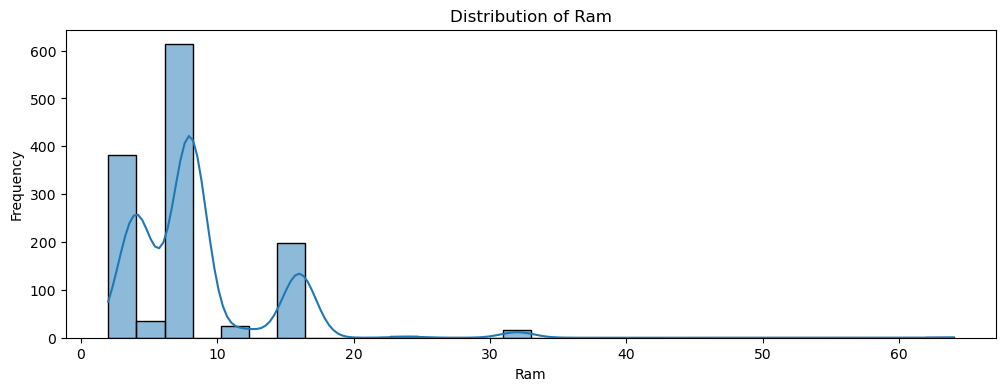

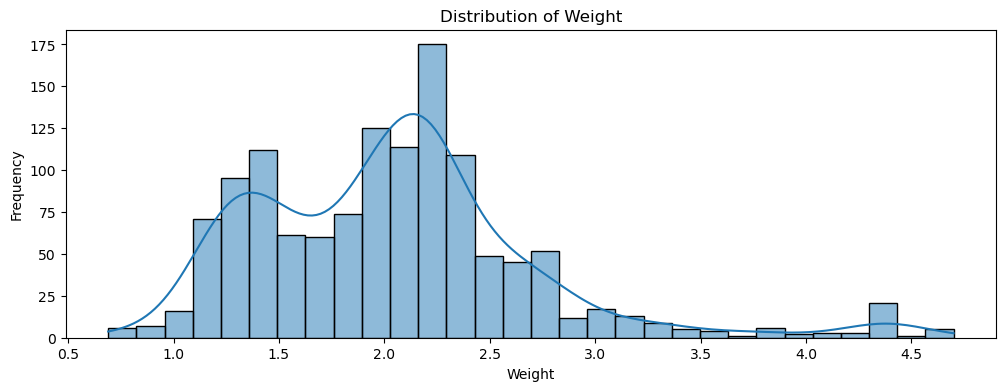

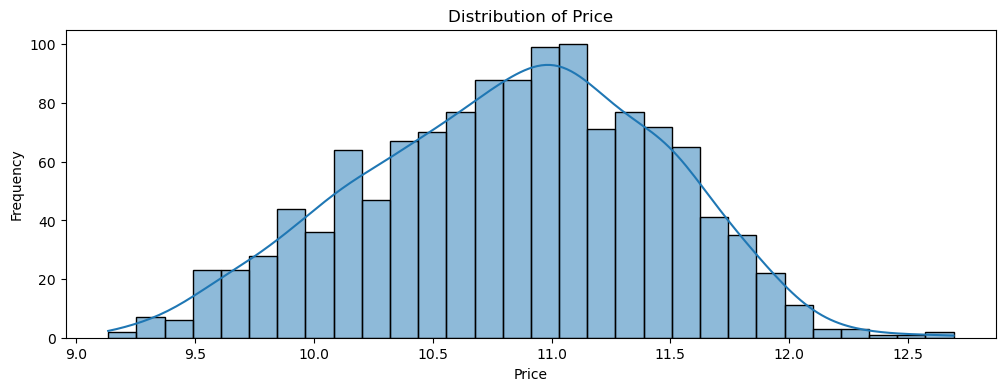

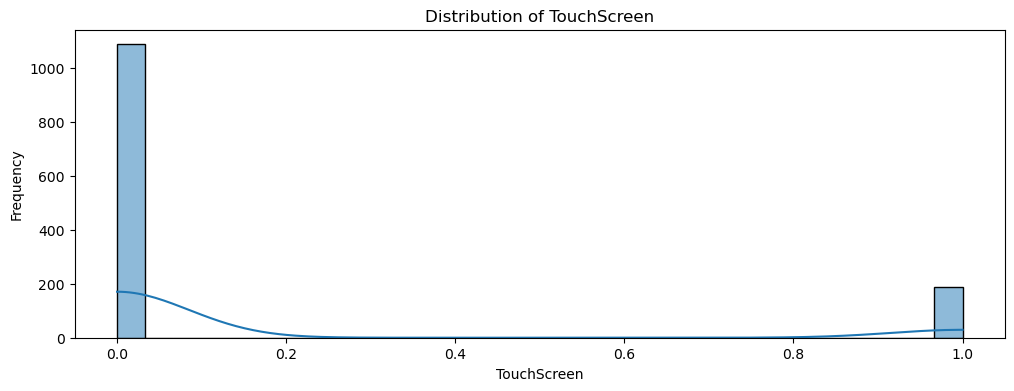

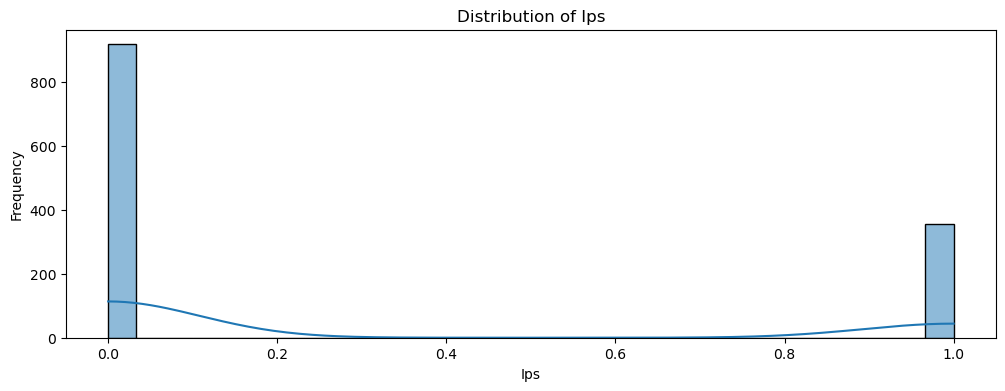

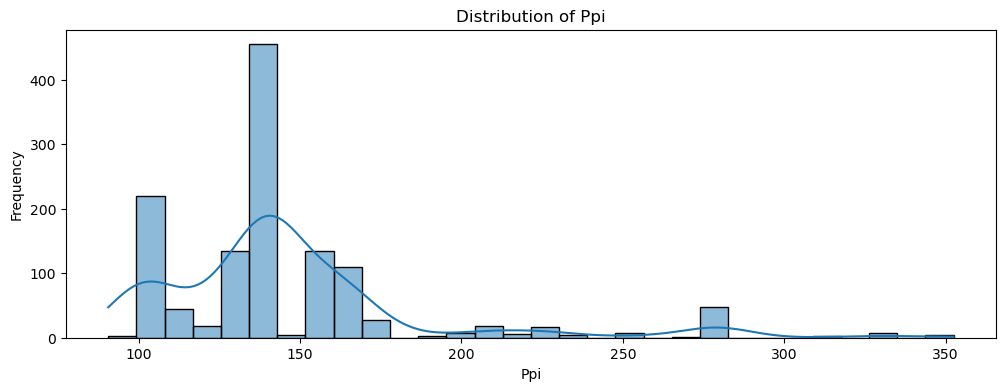

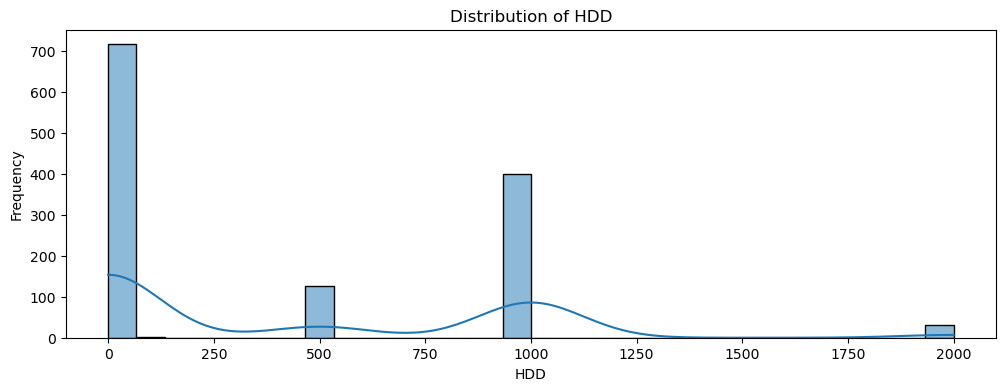

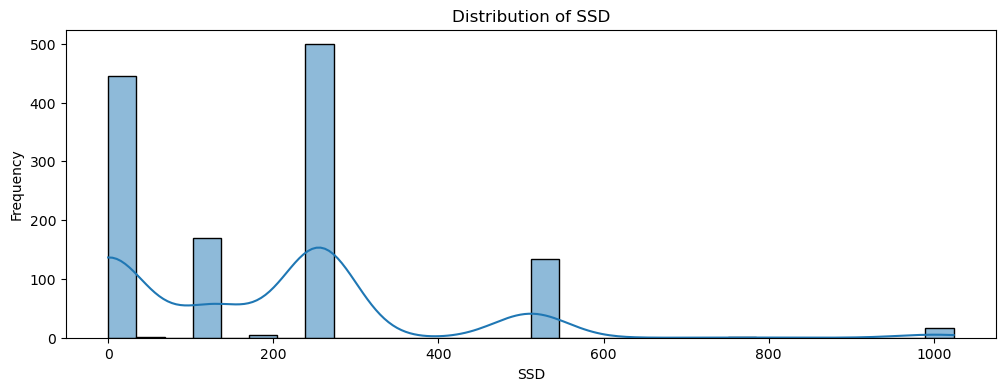

In [21]:
for i in numerical_data.columns:
    plt.figure(figsize=(12,4))
    sns.histplot(numerical_data[i], kde=True, bins=30)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.show()

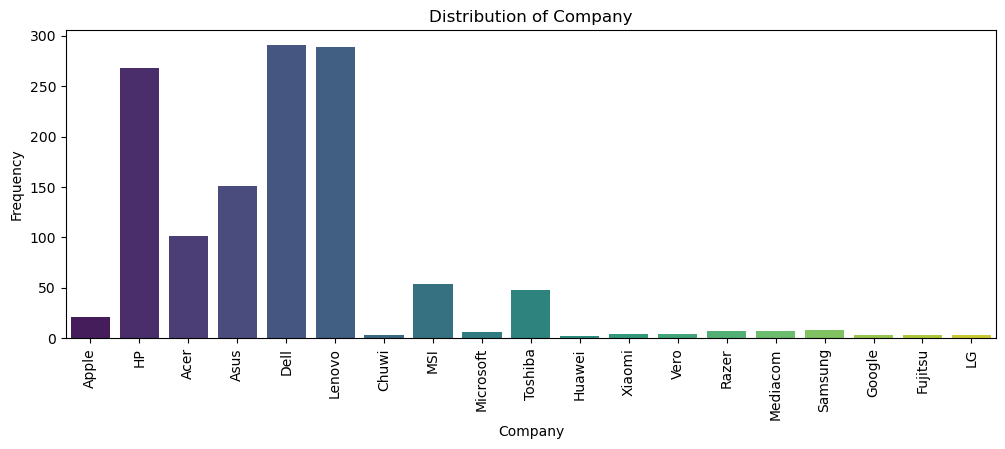

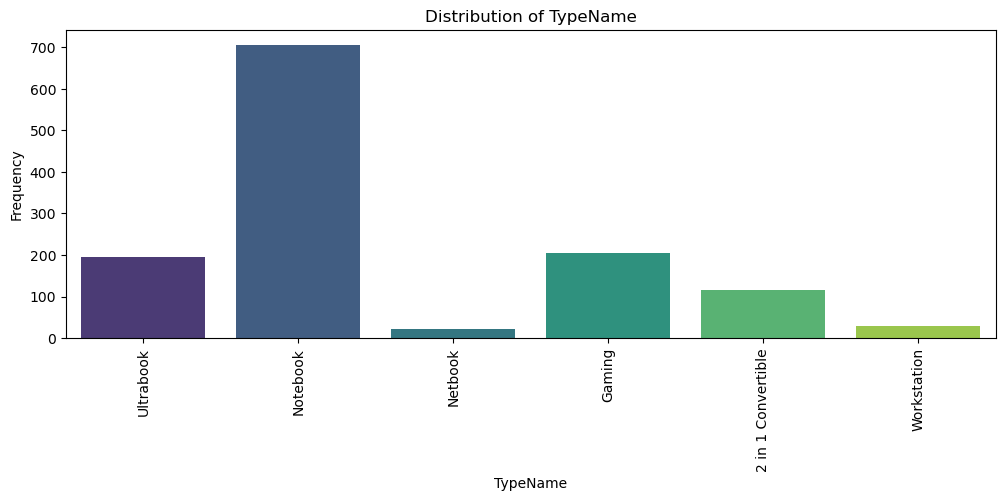

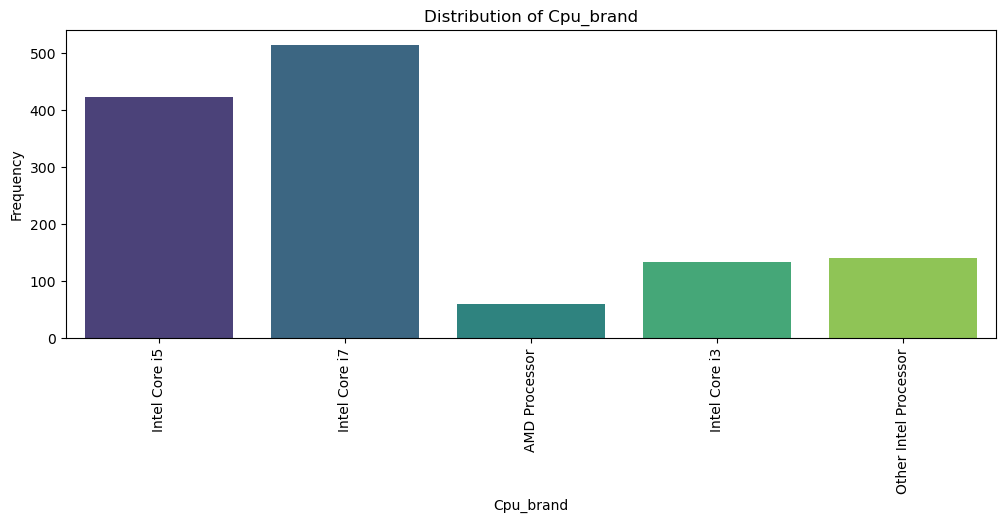

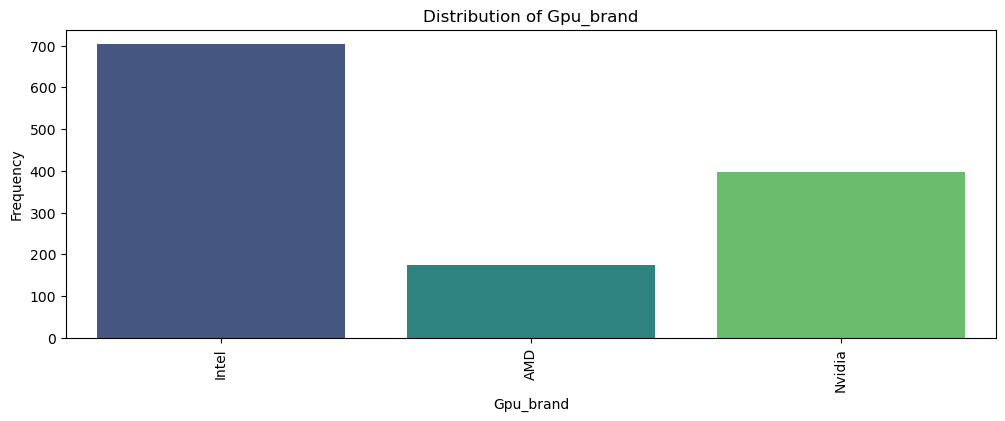

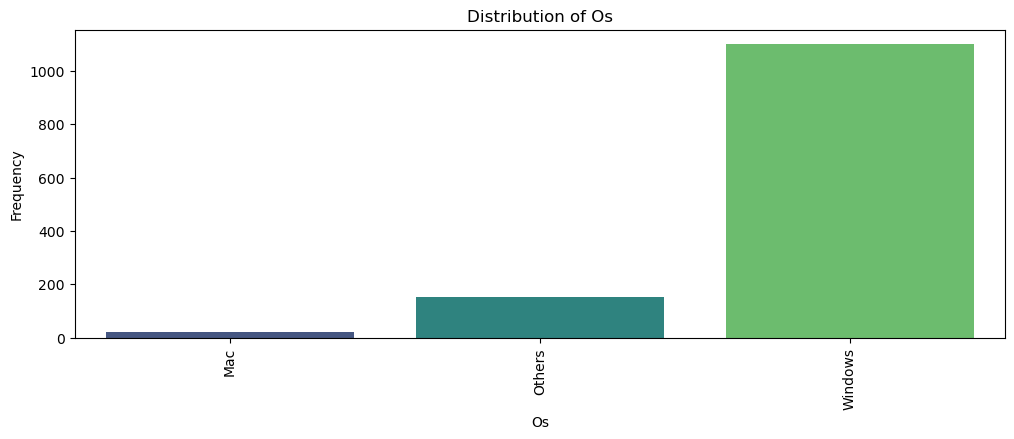

In [22]:
# Looping through the categorical variable and plot

for i in categorical_data.columns:
    plt.figure(figsize=(12,4))
    sns.countplot(categorical_data[i], palette='viridis')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.show()

## Step 3: Data Exploration

Os
Mac        11.274645
Others     10.242865
Windows    10.900581
Name: Price, dtype: float64

<AxesSubplot:xlabel='Os'>

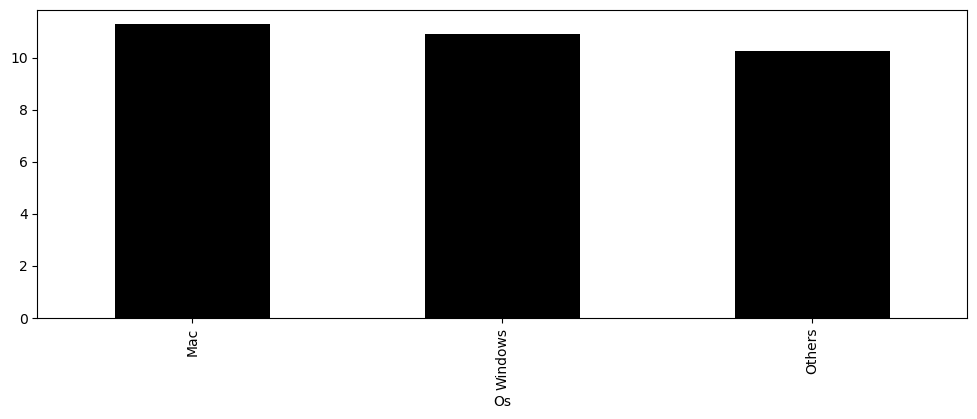

In [25]:
# Checking the average price of each model
display(laptop_data.groupby('Os')['Price'].mean())

# Visualizing the average price of each model
laptop_data.groupby('Os')['Price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,4), color='black')


## Step 4: Correlation

- This is used to check the relationship between two or more variables (ranges from -1 to +1)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000


------------------------------------------------------------------------------------------


<AxesSubplot:>

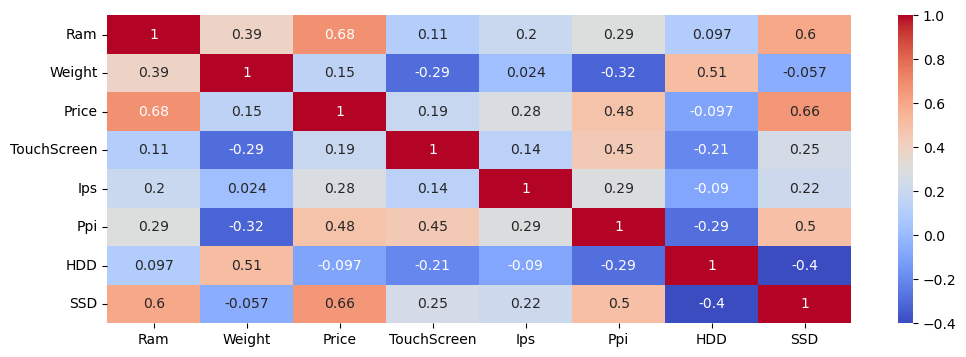

In [27]:
correlation = numerical_data.corr()
display(correlation)
print('---' * 30)
# Visualizing  the correlation
plt.figure(figsize=(12,4))

sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Step 5: Hypothesis Testing

- `Theory`:All features has no effect on the output variable(price)

Theefore, what we need to do is get the significance factor and the p-value. We will be using the `statsmodel` library in python.

In [28]:
# Import the library

import statsmodels.api as sm

# Create the x and y variable
x = numerical_data.drop('Price', axis=1)
y = numerical_data['Price']

# Add a constant(intercept) to the independent variables(x)
x_const = sm.add_constant(x)

# Fit the model

model = sm.OLS(y, x_const).fit()
display(model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          9.67e-249
Time:                        10:51:07   Log-Likelihood:                -607.93
No. Observations:                1273   AIC:                             1232.
Df Residuals:                    1265   BIC:                             1273.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.5797      0.067    143.904      0.000       9.449       9.710
Ram             0.0454      0.003     13.536      0.000       0.039       0.052
Weight          0.0722      0.023      3.125      0.002       0.027       0.117
TouchScreen    -0.0243      0.035     -0.686      0.493      -0.094       0.045
Ips             0.0974      0.026      3.763      0.000       0.047       0.148
Ppi             0.0033      0.000      9.474      0.000       0.003       0.004
HDD          3.119e-05   2.83e-05      1.103      0.270   -2.43e-05    8.67e-05
SSD             0.0011   9.42e-05     11.457      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.452   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.448
Skew:                          -0.180   Prob(JB):                     3.63e-05
Kurtosis:                       3.505   Cond. No.                     4.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Create the x and y variable
x_const2 = x_const.drop(['HDD', 'TouchScreen'], axis=1)
y = numerical_data['Price']

# Add a constant(intercept) to the independent variables(x)
x_const2 = sm.add_constant(x_const2)

# Fit the model 

model2 = sm.OLS(y, x_const2).fit()
display(model2.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     384.5
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          5.80e-251
Time:                        11:01:39   Log-Likelihood:                -608.78
No. Observations:                1273   AIC:                             1230.
Df Residuals:                    1267   BIC:                             1260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5757      0.066    144.627      0.000       9.446       9.706
Ram            0.0461      0.003     14.193      0.000       0.040       0.052
Weight         0.0842      0.021      3.990      0.000       0.043       0.126
Ips            0.0952      0.026      3.687      0.000       0.045       0.146
Ppi            0.0032      0.000      9.759      0.000       0.003       0.004
SSD            0.0010   8.35e-05     12.348      0.000       0.001       0.001
==============================================================================
Omnibus:                       19.005   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.545
Skew:                          -0.205   Prob(JB):                     7.72e-06
Kurtosis:                       3.526   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Build 

### - Linear Regression

In [32]:
# Splitting into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_const2, y, test_size=0.3, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(891, 6)

(382, 6)

(891,)

(382,)

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train,)

LinearRegression()

In [34]:
# Prediction

lr_pred = lr_model.predict(X_test)
lr_pred

array([10.75476434, 10.85084539, 11.24927898, 11.2426391 , 10.98572003,
       10.97605503, 10.26426879, 10.39101536, 10.84277718, 11.52007088,
       10.84941705, 10.87076502, 10.8533247 , 10.69853675, 11.145083  ,
       11.47429929, 10.8733984 , 10.44359334, 11.30239799, 11.24463107,
       10.20260221, 10.95860727, 10.71862112, 11.14574698, 10.27263216,
       11.46104629, 10.60813804, 10.83092576, 10.81589467, 10.98094223,
       10.86823896, 10.87100564, 10.48231302, 10.59485829, 10.95318463,
       10.9658004 , 10.7280549 , 10.87076502, 11.29661917, 10.26599228,
       10.38437548, 11.23968691, 10.86402478, 10.81589467, 10.27263216,
       10.94442291, 11.26255873, 10.26997621, 10.95318463, 10.97368192,
       10.86815263, 11.08490426, 10.9785269 , 10.33462476, 10.29987576,
       10.73358696, 10.64182045, 10.38437548, 10.98572003, 13.1714355 ,
       12.02972681, 10.84154957, 11.20410046, 10.32112337, 10.78689379,
       10.83979822, 10.33462476, 10.39765523, 10.59485829, 10.76

In [38]:
# Accuracy Check

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr_score = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
print('r2_score:', lr_score)
print('Mean Squared Error:', lr_mse)
print('Mean Absolute Error:', lr_mae)

r2_score: 0.5836567201457099
Mean Squared Error: 0.16455156567279866
Mean Absolute Error: 0.319852524824818


### - Decision Tree Regression

In [43]:
# Import the decision tree
from sklearn.tree import DecisionTreeRegressor
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
# Prediction

dtree_pred = dtree_model.predict(X_test)
dtree_pred

array([10.31666916, 10.90412426, 11.45286872, 11.35269474, 10.69655905,
       11.47054726,  9.63155284, 10.14842143, 11.03946499, 11.83844306,
       10.87225536, 10.97315701, 10.69098481, 10.55342238, 10.97771698,
       11.60061937, 11.29404121, 10.13887583, 11.91783442, 11.45286872,
        9.31789528, 11.07224574, 10.16770071, 11.47054726,  9.99348119,
       11.54342363, 10.63772219, 11.35780333, 11.17252526, 10.73132995,
       10.65768215, 11.06146249, 10.2652766 , 10.604819  , 10.87225536,
       10.91675108, 10.43779122, 10.97315701, 11.4816032 ,  9.8889595 ,
       10.13308419, 11.98617623, 11.11442803, 11.17252526,  9.99348119,
       11.33610306, 11.34767905, 10.40856152, 10.87225536, 12.25687997,
       11.14491104, 10.80859276, 10.71608039, 10.16792352,  9.80450664,
       10.90017342, 11.41394456, 10.13308419, 10.69655905, 12.58788256,
       11.91257852, 11.51841585, 11.28811452, 10.39718329, 10.95443531,
       10.64026368, 10.16792352, 10.8214409 , 10.604819  , 10.43

In [47]:
# Accuracy Check
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

dtree_score = r2_score(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_mae = mean_absolute_error(y_test, dtree_pred)

print('r2_score:', dtree_score)
print('Mean Squared Error:', dtree_mse)
print('Mean Absolute Error:', dtree_mae)

r2_score: 0.685991270983741
Mean Squared Error: 0.12410582923935852
Mean Absolute Error: 0.2544407551897558


### - Random Forest


In [ ]:
# Import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfc_model = RandomForestRegressor()
rfc_model.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
# Prediction

rfc_pred = rfc_model.predict(X_test)
rfc_pred

array([10.45985256, 10.93247123, 11.43566074, 11.38934002, 10.70449409,
       11.51079951,  9.97359009, 10.15087466, 10.95087996, 11.64766268,
       10.88923325, 11.06652039, 10.73569937, 10.75188282, 11.08670956,
       11.6149953 , 11.3058668 , 10.27273944, 11.77283298, 11.40783122,
        9.37578905, 11.05691776, 10.21523944, 11.16645407,  9.99748434,
       11.50474672, 10.64774759, 11.24869239, 11.16392107, 10.70822578,
       10.73065682, 11.08598593, 10.35018648, 10.5911588 , 11.04436183,
       11.00144765, 10.41927128, 11.06652039, 11.49939423,  9.89774178,
       10.13409351, 11.89242516, 10.98841059, 11.16392107,  9.99748434,
       11.3282075 , 11.52259721, 10.36071097, 11.04436183, 11.72953758,
       11.41451021, 11.18083027, 10.76160646, 10.24091554,  9.80718628,
       10.83557566, 11.29121454, 10.13409351, 10.70449409, 12.37046054,
       11.78784526, 11.14098761, 11.32882754, 10.20075746, 11.15963021,
       10.63447599, 10.24091554, 10.61999336, 10.5911588 , 10.34

In [55]:
# Accuracy Check
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rfc_score = r2_score(y_test, rfc_pred)
rfc_mse = mean_squared_error(y_test, rfc_pred)
rfc_mae = mean_absolute_error(y_test, rfc_pred)

print('r2_score:', rfc_score)
print('Mean Squared Error:', rfc_mse)
print('Mean Absolute Error:', rfc_mae)

r2_score: 0.7730114433797474
Mean Squared Error: 0.08971280236525811
Mean Absolute Error: 0.22253487554670065
